# Homework 8  

**In the first problem I want you to think about loss functions for binary data. The second exercise prepares you for the "multinomial" case where we have more than 2 categories as outcome.**

1. **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot the resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$.
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$**
2. **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

**Loading the dataset**

In [2]:
df = pd.read_csv('../data/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [3]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


## Task 1

1. **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot the resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$.
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$**

In [4]:
df = df.sample(n=1000, random_state=101)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

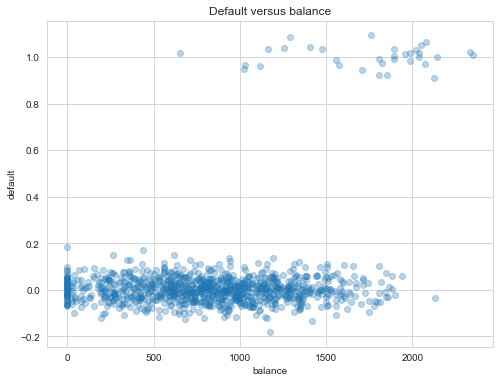

In [5]:
#add jitter to your plot:
df["defaultJitter"] = (df["default"]=="Yes") + 0.05*np.random.randn(len(df))

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(data=df, x="balance", y="defaultJitter", alpha=0.3)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance');

Fit a logistic regression `default ~ balance` model

In [28]:
X = df[["balance"]]
y = df["default"]=="Yes"

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

Predict the default probability on a regular array of balance values between on the interval  [0;3000]  and plot the resulting sigmoid-shaped curve.

In [30]:
X_pred = np.arange(0,3000).reshape(-1, 1)

In [31]:
y_pred = model.predict(X_pred)

array([False, False, False, ...,  True,  True,  True])

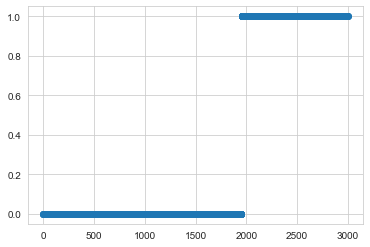

In [32]:
plt.scatter(X_pred,y_pred)

Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$.

In [35]:
y_pred_prob = model.predict_proba(X_pred)

In [39]:
df_pred = pd.DataFrame(y_pred_prob, columns=["0","1"])

In [56]:
def find_balance(df, column, values):
    '''find index (balance) closest to value'''
    return [abs(df[column] - value).idxmin() for value in values]

In [59]:
balances = find_balance(df_pred,"1",[0.5,0.05, 0.005, 0.0005])

Overlay these 4 points on the plot with a y value of  𝑑𝑒𝑓𝑎𝑢𝑙𝑡=1  (yes).

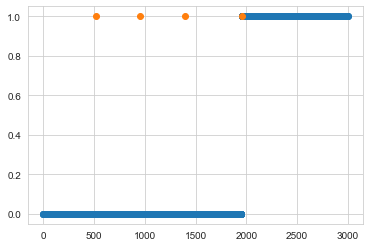

In [62]:
plt.scatter(X_pred,y_pred)
plt.scatter(balances,np.ones(4));

Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
* Squared Error: $(y_i - \hat{p}_i)^2$
* Log Loss: $y_i \cdot \log{\hat{p}_i}$
* Hinge: `np.max(0, 1 - pHat * y)`
* Accuracy: $y_i == (\hat{p}_i > 0.5)$

In [69]:
y = 1
pHat = [0.5,0.05, 0.005, 0.0005]

In [66]:
# Squared Error
sqe = [(y-p)**2 for p in pHat]
sqe

[0.25, 0.9025, 0.990025, 0.9990002500000001]

* Misclassification with low probabilities are penalized stronger
* Penalties are bound between 0 (worst) and 1 (best)

In [80]:
# Log Loss
log_loss = [np.round(y*np.log(p),2) for p in pHat]
log_loss

[-0.69, -3.0, -5.3, -7.6]

* Misclassification with low probabilities are penalized strongest
* Penalties are always negative

In [72]:
# Hinge loss
hinge = [np.max((0, 1 - p * y)) for p in pHat]
hinge

[0.5, 0.95, 0.995, 0.9995]

* Misclassification with low probabilities are penalized stronger 
* Penalties are bound between 0 (best) an 1 (worst)

In [76]:
# Accuracy
acc = [y==(p>0.5) for p in pHat]
acc

[False, False, False, False]

* Hardly penalizes any kind of misclassification
* each misclassification is treated equally 

## Task 2

2. **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.

The iris data:

In [82]:
from sklearn import datasets

iris = datasets.load_iris()

In [94]:
flower_types = iris['target_names']

X_iris = pd.DataFrame(iris['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])
y_iris = pd.get_dummies(pd.DataFrame(list(map(lambda x: flower_types[x], iris['target'])), columns=['target']))

X_iris.join(y_iris)

,sepal_length,sepal_width,petal_length,petal_width,target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.

In [91]:
setosa_model = LogisticRegression().fit(X_iris, y_iris["target_setosa"])

In [92]:
versicolor_model = LogisticRegression().fit(X_iris, y_iris["target_versicolor"])

In [93]:
virginica_model = LogisticRegression().fit(X_iris, y_iris["target_virginica"])

How could you combine these 3 models into one ?

* Each model could predict the probability of the class membership. The argmax of these scores is then used to predict a class.

Think about possible shortcomings of this "one verus the rest" strategy.

* It requires one model to be created for each class. This could be an issue for large datasets, slow models, or very large numbers of classes